In [2]:
#导入numpy、pandas、plt
import numpy as np
import matplotlib.pyplot as plt
import random

# 苏格拉底的麦穗

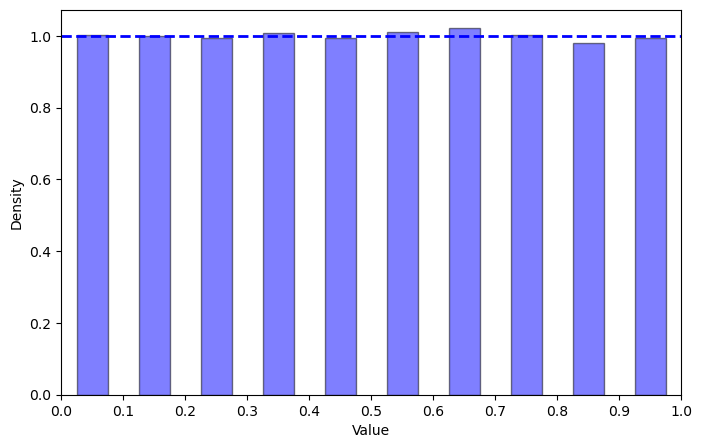

In [24]:
# 生成一个数组含有N个概率分布函数为均匀分布的数
N=100000
data = np.random.random(size=N)

midpoints = np.arange(0,1,0.1)
bins = np.array(midpoints)
bins = np.append(bins, bins[-1] + 0.1)

hist, _ = np.histogram(data, bins=bins, density=True)

# 绘制概率密度柱状图
plt.figure(figsize=(8, 5))
plt.bar(np.arange(0.05,1,0.1), hist, width=0.05,color='blue',alpha=0.5, edgecolor='black')
# plt.title('Probability Density Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim(0,1)
# plt.grid(True)
plt.axhline(y=1,ls="--",c="blue",linewidth=2)
#保存图片，dpi=300
# plt.savefig('100000-Probability Density Distribution.png',dpi=300)
plt.show()

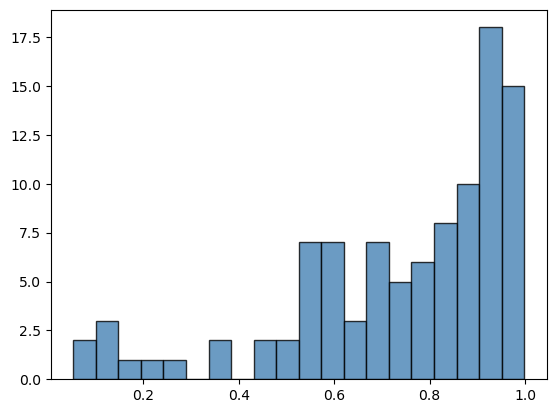

In [8]:
def Monte_Carlo(N, n):
  if n>=N:
    return np.array([0]),0,np.array([0])
  else:
    p=0
    # 创建一个空列表，用于存放结果
    result = []
    # 循环1000000/N次
    sort=[]
    for i in range(100):
      # 生成N个0~1之间的随机数，存入一个列表
      data = [random.random() for j in range(N)]
      # 从数据的第n个数进行遍历
      for j in range(n, N):
        if j==N-1:
          result.append(data[-1])
          sort.append(j+1)
          if data[j]==max(data[:]):
            p=p+1
          break
        # 如果其大于前n个数的最大值，选择它并将结束恋爱
        if data[j] > max(data[:n]):
          result.append(data[j])
          #将确认关系是第几个存入sort
          sort.append(j+1)
          if data[j]==max(data[:]):
            p=p+1
          break
    return np.array(result),p,np.array(sort)
# print(len(list),len(sort),p/len(list))
list,p,sort=Monte_Carlo(10,2)
#绘制直方图
plt.hist(list, bins=20, color='steelblue', edgecolor='k', alpha=0.8)
#显示图形
plt.show()

In [9]:
array=[]
a=np.arange(1,100)
for n in a:
    list,p,sort=Monte_Carlo(100, n)
    array.append(p)
func=lambda x:-x*np.log(x)

In [46]:
#将array存入文件
# np.savetxt('array-100.txt',array)

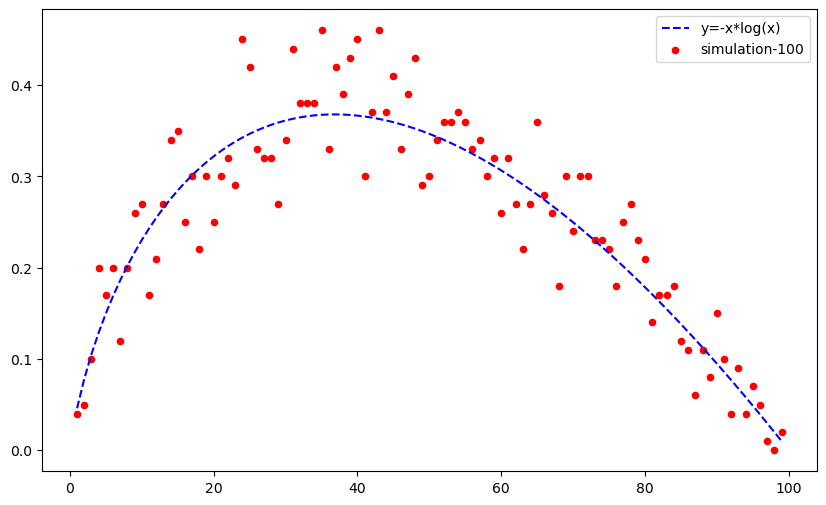

In [10]:
plt.figure(figsize=(10,6))
plt.plot(a,func(a/100),c='b',label='y=-x*log(x)',ls='--',lw=1.5)
plt.scatter(a,np.array(array)/100,s=20,c='r',marker='o',label='simulation-100')
plt.legend()
plt.show()

In [54]:
data=np.zeros((10,10,3))
for N in np.arange(1,11):
    for n in np.arange(1,N):
        list,p,sort=Monte_Carlo(N, n)
        data[N-1,n-1,0]=list.mean()
        data[N-1,n-1,1]=p/int(1000000/N)
        data[N-1,n-1,2]=sort.mean()

In [59]:
#将data（3维数据）存入文件
# np.savetxt('data-期望.txt',data[:,:,0])
# np.savetxt('data-几率.txt',data[:,:,1])
# np.savetxt('data-平均次数.txt',data[:,:,2])

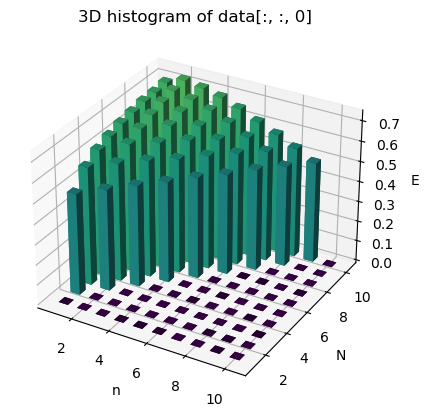

In [6]:
import matplotlib.cm as cm
# 创建一个3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 设置x和y的范围，你可以根据自己的需要修改
x_min = 1
x_max = 10
y_min = 1
y_max = 10

# 设置柱子的宽度，你可以根据自己的需要修改
dx = 0.5
dy = 0.5

# 设置柱子之间的间隔，你可以根据自己的需要修改
gap = 0.2

# 计算柱子的位置和高度
xpos, ypos = np.meshgrid(np.arange(x_min, x_max + 1), np.arange(y_min, y_max + 1))
xpos = xpos.flatten() - dx / 2 + gap / 2
ypos = ypos.flatten() - dy / 2 + gap / 2
zpos = np.zeros_like(xpos)
height = data[:, :, 0].flatten()
colors = cm.viridis(height)
# 绘制3D直方图
ax.bar3d(xpos, ypos, zpos, dx, dy, height, color=colors)
ax.set_xlabel('n')
ax.set_ylabel('N')
ax.set_zlabel('E')
plt.title('3D histogram of data[:, :, 0]')

plt.show()


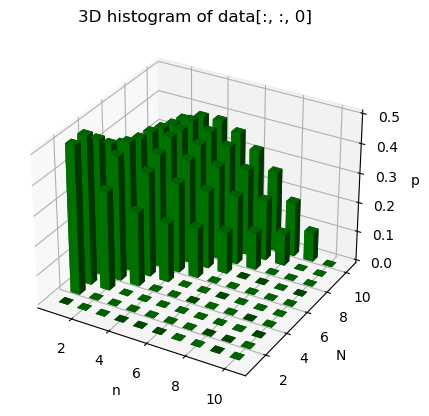

In [7]:
# 创建一个3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 设置x和y的范围，你可以根据自己的需要修改
x_min = 1
x_max = 10
y_min = 1
y_max = 10

# 设置柱子的宽度，你可以根据自己的需要修改
dx = 0.5
dy = 0.5

# 设置柱子之间的间隔，你可以根据自己的需要修改
gap = 0.2

# 计算柱子的位置和高度
xpos, ypos = np.meshgrid(np.arange(x_min, x_max + 1), np.arange(y_min, y_max + 1))
xpos = xpos.flatten() - dx / 2 + gap / 2
ypos = ypos.flatten() - dy / 2 + gap / 2
zpos = np.zeros_like(xpos)
height = data[:, :, 1].flatten()

# 绘制3D直方图
ax.bar3d(xpos, ypos, zpos, dx, dy, height, color='green')
ax.set_xlabel('n')
ax.set_ylabel('N')
ax.set_zlabel('p')
plt.title('3D histogram of data[:, :, 0]')
plt.show()

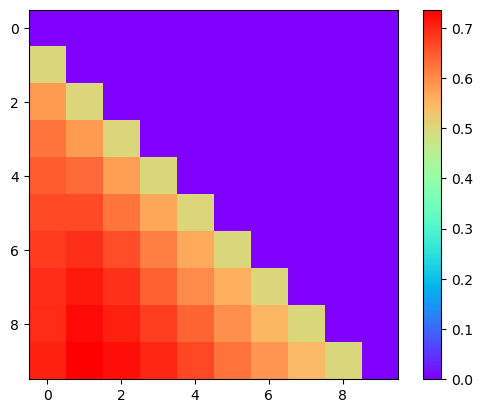

In [8]:
#绘制data[:,:,0]的热力图
plt.imshow(data[:,:,0], cmap=plt.cm.rainbow)
#添加颜色标注
plt.colorbar()
#显示图形
plt.show()

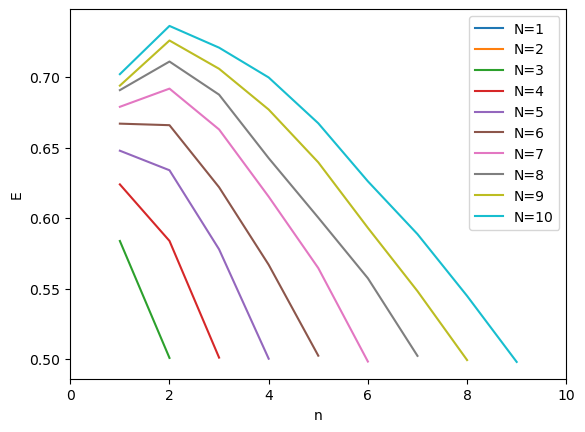

In [9]:
for i in np.arange(1,11):
    plt.plot(np.arange(1,i),data[i-1,:i-1,0],label='N='+str(i),lw=1.5,ms=5)
# plt.xlim(0,1)
plt.xticks(np.arange(0,11,2))
plt.xlabel('n') 
plt.ylabel('E')
plt.legend()
plt.show()

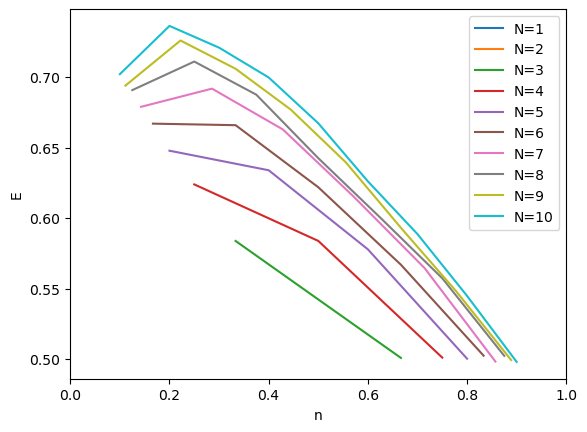

In [10]:
for i in np.arange(1,11):
    plt.plot(np.arange(1,i)/i,data[i-1,:i-1,0],label='N='+str(i),lw=1.5,ms=5)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.2))
plt.xlabel('n') 
plt.ylabel('E')
plt.legend()
plt.show()

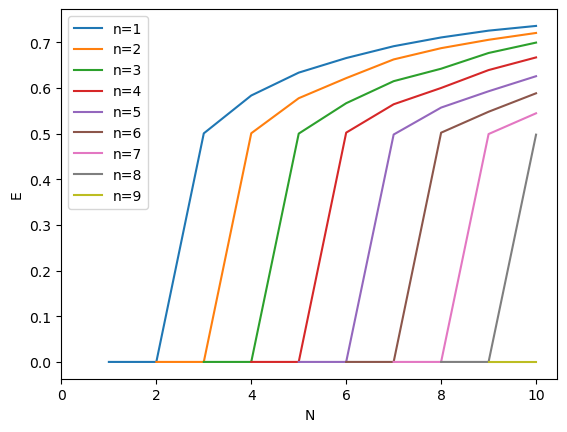

In [11]:
for i in np.arange(1,10):
    plt.plot(np.arange(i,11),data[i-1:,i,0],label='n='+str(i),lw=1.5,ms=5)
# plt.xlim(0,1)
plt.xticks(np.arange(0,11,2))
plt.xlabel('N') 
plt.ylabel('E')
plt.legend()
plt.show()

In [4]:
data1=np.zeros((20,20,3))
for N in np.arange(1,21):
    for n in np.arange(1,N):
        list,p,sort=Monte_Carlo(N, n)
        data1[N-1,n-1,0]=list.mean()
        data1[N-1,n-1,1]=p/int(1000000/N)
        data1[N-1,n-1,2]=sort.mean()

In [8]:
#data1存入文件
# np.savetxt('data1-几率.txt',data1[:,:,1])

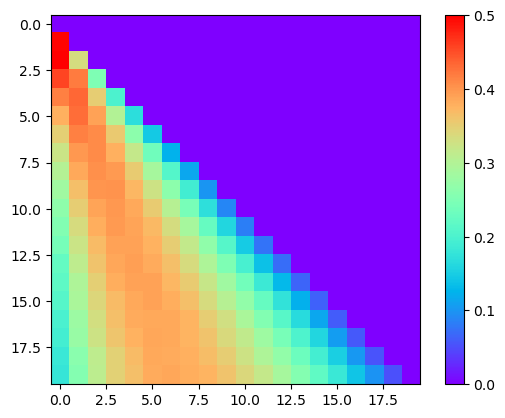

In [7]:
#绘制data[:,:,0]的热力图
plt.imshow(data1[:,:,1], cmap=plt.cm.rainbow)
#添加颜色标注
plt.colorbar()
#显示图形
plt.show()

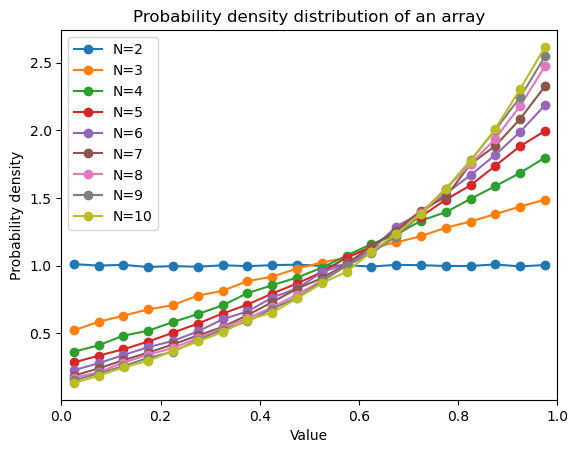

In [10]:
mean=[]
for N in np.arange(2, 11, 1):
    # 定义一个数组，可以是任意的一维数组
    array,p,sort = Monte_Carlo(N,1)
    mean.append([array.mean(),sort.mean()])
    # 计算数组的概率密度分布，使用numpy的histogram函数
    # bins参数指定了分组的个数，density参数指定了是否归一化为积分为1
    hist, bins = np.histogram(array, bins=20, density=True)

    # 计算每个分组的中点，用于绘制点线图
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # 绘制点线图，使用matplotlib的plot函数
    # marker参数指定了点的形状，linestyle参数指定了线的样式
    plt.plot(bin_centers, hist,label='N=%d'%N,marker='o', linestyle='-')
mean=np.array(mean)
plt.legend()
# 添加标题和坐标轴标签
plt.title('Probability density distribution of an array')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.xlim(0, 1)
# 显示图像
plt.show()

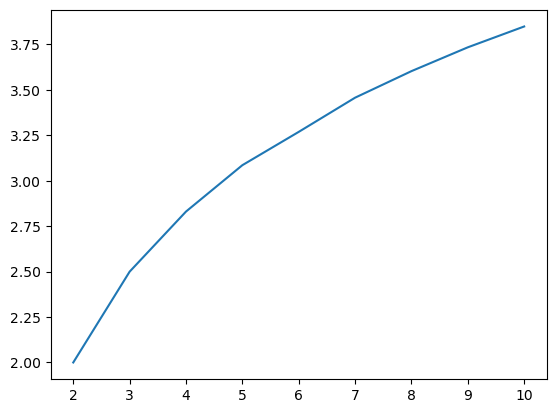

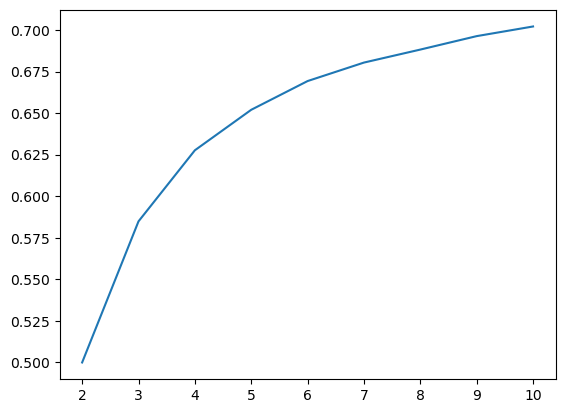

In [15]:
plt.plot(np.arange(2, 11, 1),mean[:,1])
plt.show()
plt.plot(np.arange(2, 11, 1),mean[:,0])
plt.show()

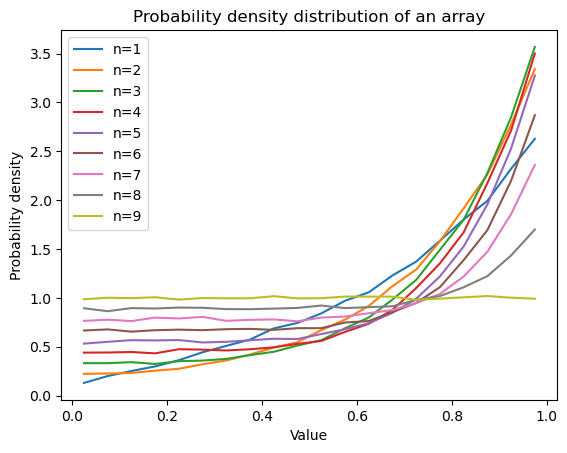

In [11]:
# for N in np.arange(2, 11, 1):
N=10
# 定义一个数组，可以是任意的一维数组
for n in np.arange(1,10):
# for f in np.arange(0,1,0.2):
    array,p,sort = Monte_Carlo(N,n)

    # 计算数组的概率密度分布，使用numpy的histogram函数
    # bins参数指定了分组的个数，density参数指定了是否归一化为积分为1
    hist, bins = np.histogram(array, bins=20, density=True)

    # 计算每个分组的中点，用于绘制点线图
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # 绘制点线图，使用matplotlib的plot函数
    # marker参数指定了点的形状，linestyle参数指定了线的样式
    plt.plot(bin_centers, hist,label='n={}'.format(np.round(n)),marker='', linestyle='-')
plt.legend()
# 添加标题和坐标轴标签
plt.title('Probability density distribution of an array')
plt.xlabel('Value')
plt.ylabel('Probability density')
# plt.xlim(0.9, 1)
# plt.ylim(10, 13)
# 显示图像
plt.show()

# 如果正态分布呢？

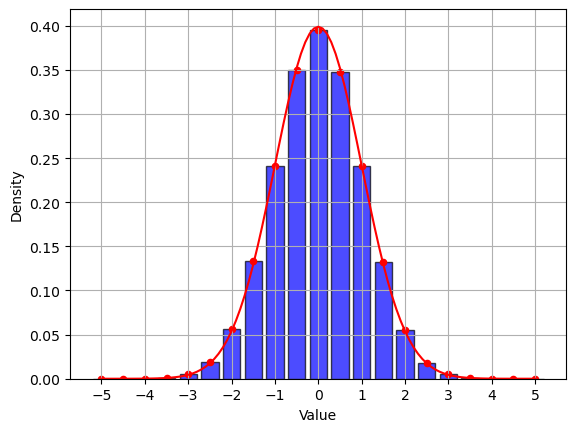

0.7958528125983987

In [22]:
# 生成一个数组含有N个概率分布函数为正态分布的数
N=100000
data = np.random.normal(size=N)

midpoints = np.arange(-5,5.5,0.5)
bins = np.array(midpoints) - 0.25
bins = np.append(bins, bins[-1] + 0.5)

hist, _ = np.histogram(data, bins=bins, density=True)

# 绘制概率密度柱状图
plt.bar(midpoints, hist, width=0.4, color='blue',edgecolor='black', alpha=0.7)
plt.scatter(midpoints, hist, s=20, c='red', marker='o')
#绘制正态分布曲线
x=np.arange(-5,5.1,0.1)
y=np.exp(-x**2/2)/np.sqrt(2*np.pi)
plt.plot(x,y,c='r',lw=1.5)
# plt.title('Probability Density Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xticks(np.arange(-5,6,1))
plt.grid(True)
#保存图片，dpi=300
# plt.savefig('正态分布.png',dpi=300)
plt.show()
#data>0的均值
data[data>0].mean()

100000 100000 0.09954


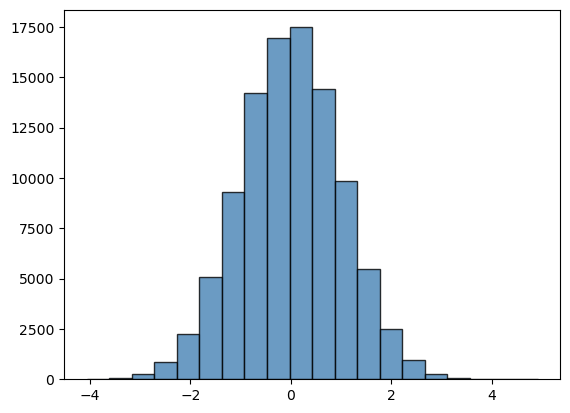

In [24]:
def Monte_Carlo(N, n):
  if n>=N:
    return np.array([0]),0,np.array([0])
  else:
    p=0
    # 创建一个空列表，用于存放结果
    result = []
    # 循环1000000/N次
    sort=[]
    for i in range(int(1000000/N)):
      # 生成N个0~1之间的随机数，存入一个列表
      data = np.random.normal(size=N)
      # 从数据的第n个数进行遍历
      for j in range(n, N):
        if j==N-1:
          result.append(data[-1])
          sort.append(j+1)
          if data[j]==max(data[:]):
            p=p+1
          break
        # 如果其大于前n个数的最大值，选择它并将结束恋爱
        if data[j] > max(data[:n]):
          result.append(data[j])
          #将确认关系是第几个存入sort
          sort.append(j+1)
          if data[j]==max(data[:]):
            p=p+1
          break
    return np.array(result),p,np.array(sort)

list,p,sort=Monte_Carlo(10,9)
#绘制直方图
plt.hist(list, bins=20, color='steelblue', edgecolor='k', alpha=0.8)
#显示图形
print(len(list),len(sort),p/len(list))
plt.show()

In [25]:
array=[]
a=np.arange(1,100)
for n in a:
    list,p,sort=Monte_Carlo(100, n)
    array.append(p)
#将array存入文件
# np.savetxt('array-正态.txt',array)

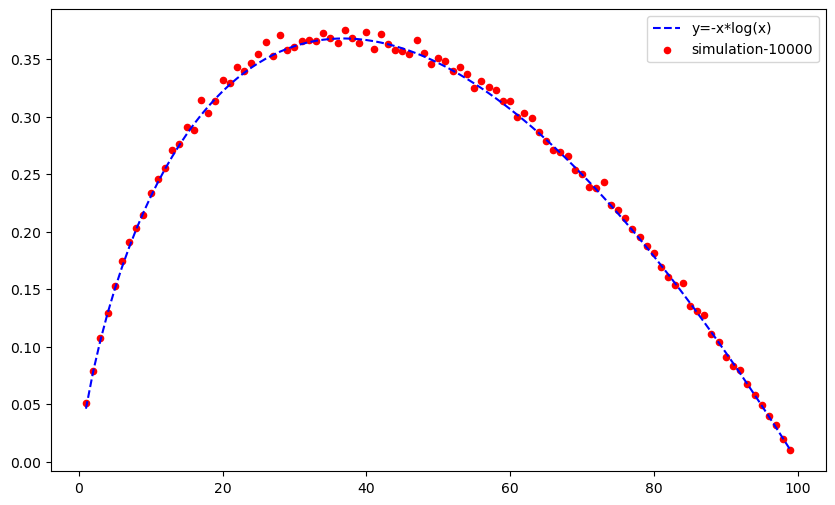

In [28]:
func=lambda x:-x*np.log(x)
plt.figure(figsize=(10,6))
plt.plot(a,func(a/100),c='b',label='y=-x*log(x)',ls='--',lw=1.5)
plt.scatter(a,np.array(array)/10000,s=20,c='r',marker='o',label='simulation-10000')
plt.legend()
plt.show()

In [29]:
data=np.zeros((10,10,3))
for N in np.arange(1,11):
    for n in np.arange(1,N):
        list,p,sort=Monte_Carlo(N, n)
        data[N-1,n-1,0]=list.mean()
        data[N-1,n-1,1]=p/int(100000/N)
        data[N-1,n-1,2]=sort.mean()

In [34]:
#将data（3维数据）存入文件
# np.savetxt('data-期望-正态.txt',data[:,:,0])
# np.savetxt('data-几率-正态.txt',data[:,:,1]/10)
# np.savetxt('data-平均次数-正态.txt',data[:,:,2])

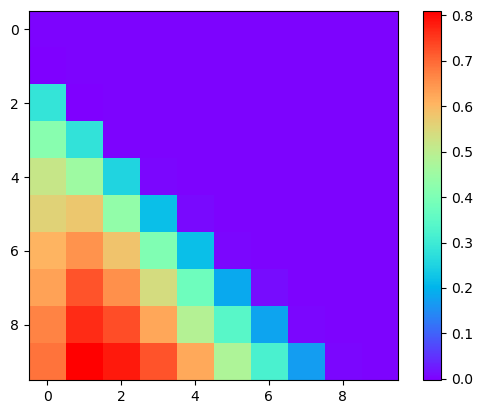

In [22]:
#绘制data[:,:,0]的热力图
plt.imshow(data[:,:,0], cmap=plt.cm.rainbow)
#添加颜色标注
plt.colorbar()
#显示图形
plt.show()

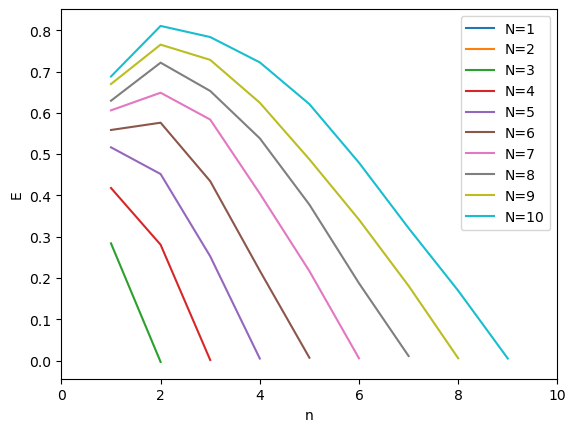

In [23]:
for i in np.arange(1,11):
    plt.plot(np.arange(1,i),data[i-1,:i-1,0],label='N='+str(i),lw=1.5,ms=5)
# plt.xlim(0,1)
plt.xticks(np.arange(0,11,2))
plt.xlabel('n') 
plt.ylabel('E')
plt.legend()
plt.show()

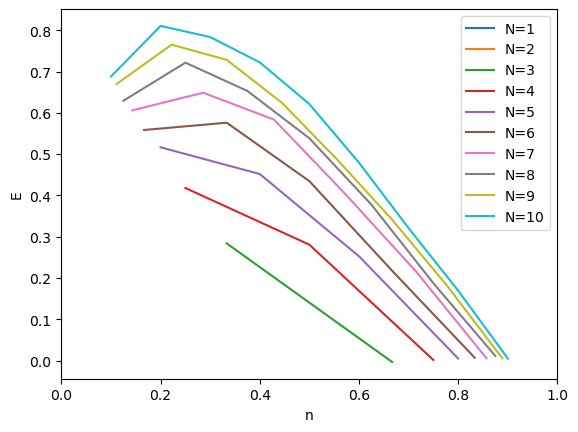

In [24]:
for i in np.arange(1,11):
    plt.plot(np.arange(1,i)/i,data[i-1,:i-1,0],label='N='+str(i),lw=1.5,ms=5)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.2))
plt.xlabel('n') 
plt.ylabel('E')
plt.legend()
plt.show()

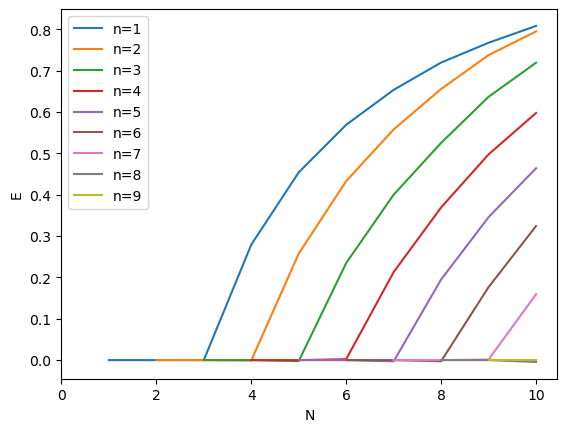

In [32]:
for i in np.arange(1,10):
    plt.plot(np.arange(i,11),data[i-1:,i,0],label='n='+str(i),lw=1.5,ms=5)
# plt.xlim(0,1)
plt.xticks(np.arange(0,11,2))
plt.xlabel('N') 
plt.ylabel('E')
plt.legend()
plt.show()

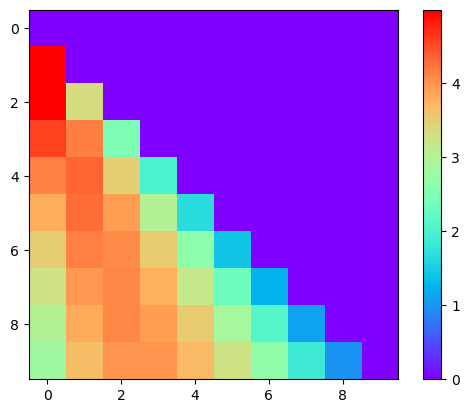

In [33]:
#绘制data[:,:,0]的热力图
plt.imshow(data[:,:,1], cmap=plt.cm.rainbow)
#添加颜色标注
plt.colorbar()
#显示图形
plt.show()

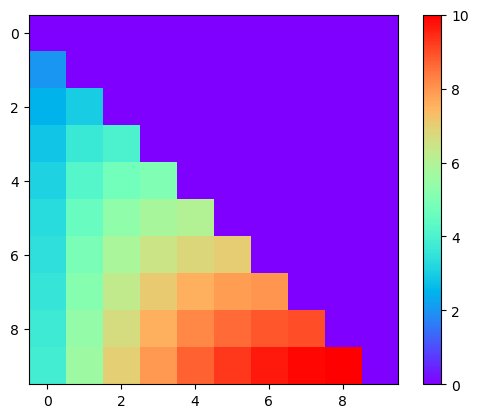

In [27]:
#绘制data[:,:,0]的热力图
plt.imshow(data[:,:,2], cmap=plt.cm.rainbow)
#添加颜色标注
plt.colorbar()
#显示图形
plt.show()

In [34]:
# 生成一个数组含有N个概率分布函数为正态分布的数
N=10000000
data = np.random.normal(size=N)
data[data>0].mean()

0.7975924802533615

In [15]:
import math
#func为标准正态分布的概率密度函数
func=lambda x:np.exp(-x**2/2)/np.sqrt(2*np.pi)
#funcjifen为func的原函数
funcjifen=lambda x:1/2*(1+math.erf(x/np.sqrt(2)))
funcjifen(0.808)

0.7904547089289292

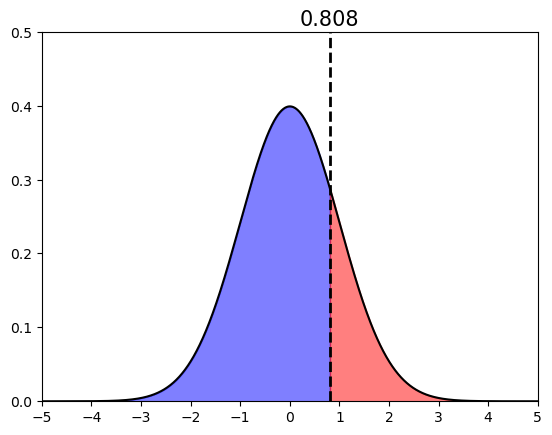

In [65]:
#绘制func的图像，从-5到5，中间用0.808分割，左边用蓝色填充，右边用红色填充
x=np.arange(-5,5.1,0.0001)
y=func(x)
plt.plot(x,y,c='black',lw=1.5)
plt.fill_between(x[x<=0.808],y[x<=0.808],color='blue',alpha=0.5)
plt.fill_between(x[x>0.808],y[x>0.808],color='red',alpha=0.5)
plt.xlim(-5,5)
plt.ylim(0,0.5)
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
#绘制x=0.808的竖线
plt.axvline(x=0.808,ls="--",c="black",linewidth=2)
#在上面的竖线上添加文字
plt.text(0.808,0.53,'0.808',fontsize=15,verticalalignment="top",horizontalalignment="center")
plt.show()